In [1]:
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from glob import glob

In [2]:
train_path = "fruits-360_dataset/fruits-360/Training/"
test_path= "fruits-360_dataset/fruits-360/Test/"

In [3]:
img= load_img(train_path+"Avocado/0_100.jpg")

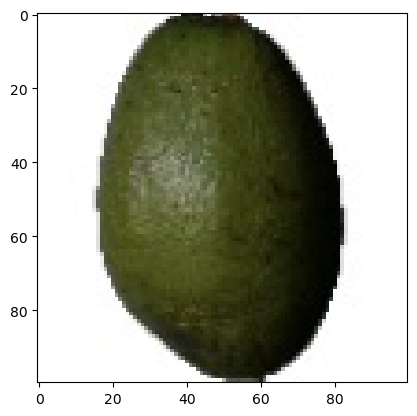

In [4]:
plt.imshow(img)
plt.show()

In [5]:
x= img_to_array(img)
print(x.shape)

(100, 100, 3)


In [6]:
num_of_class= len(glob(train_path+"/*"))   # içerisindeki herhangi bir şeyi oku
num_of_class
#glob(train_path+"/*")  olarak kalsaydı tüm meyve çeşitleri bir liste olacaktı
# uzunluğunu alınca kaç tane class olduğunu verdi

131

In [7]:
vgg= VGG16()

In [8]:
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
print(type(vgg))

<class 'keras.engine.functional.Functional'>


In [10]:
vgg_layer_list= vgg.layers
vgg_layer_list

In [11]:
model= Sequential()

In [12]:
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

örnek olarak modelden son layer'ın nasıl çıkartılacağı yazıldı. Transfer learning yapılırken modelden transfer edilen modelden gerekli olmayan layer'lar çıkarılarak istenilen layer'lar eklenecek.

In [13]:
print(model.summary())
# artık output yani prediction layer burada yok

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
for layers in model.layers:
    layers.trainable= False

# modelin son layer'ı hariç hiçbir layer yeniden train edilmeyecek
# sadece output yani prediction katmanında değişiklik yapılacak

In [15]:
model.add(Dense(num_of_class, activation="softmax"))

# burada son katmanı ve multilayer için kullanılan softmax aktivasyonunu ekledik

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [17]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics= ["accuracy"])

### Train

In [18]:
train_data= ImageDataGenerator().flow_from_directory(train_path, target_size= (224,244))
# vgg16 modeli imagenet ile eğitilmiştir vee input_shape'i 224x224'tür. Fruits360 dataset'inin ise 100x100'lük bir görsel boyutu vardı.
# burada ImageDataGenerator ile 100x100'lük input görsellerimiz 224x224 olarak reshape edilecektir.

Found 67692 images belonging to 131 classes.


In [19]:
test_data= ImageDataGenerator().flow_from_directory(test_path, target_size= (224,244))

Found 22688 images belonging to 131 classes.


In [21]:
batch_size= 64

hist= model.fit_generator(train_data, steps_per_epoch= 1600//batch_size,
                         epochs= 6,
                         validation_data= test_data,
                         validation_steps= 800//batch_size)

Epoch 1/6


C:\Users\EBRU\AppData\Local\Temp\ipykernel_11476\232701023.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist= model.fit_generator(train_data, steps_per_epoch= 1600//batch_size,


25/25 [==============================] - 385s 16s/step - loss: 0.6006 - accuracy: 0.8213 - val_loss: 0.7893 - val_accuracy: 0.7850
Epoch 2/6
25/25 [==============================] - 383s 16s/step - loss: 0.3328 - accuracy: 0.8963 - val_loss: 0.7463 - val_accuracy: 0.8263
Epoch 3/6
25/25 [==============================] - 382s 16s/step - loss: 0.3547 - accuracy: 0.8975 - val_loss: 0.9338 - val_accuracy: 0.7887
Epoch 4/6
25/25 [==============================] - 385s 16s/step - loss: 0.2272 - accuracy: 0.9337 - val_loss: 1.0675 - val_accuracy: 0.7725
Epoch 5/6
25/25 [==============================] - 384s 16s/step - loss: 0.2952 - accuracy: 0.9150 - val_loss: 0.6862 - val_accuracy: 0.8550
Epoch 6/6
25/25 [==============================] - 399s 16s/step - loss: 0.1728 - accuracy: 0.9500 - val_loss: 0.5783 - val_accuracy: 0.8562


In [22]:
model.save_weights("vgg16.h5")

### Evaluation

In [23]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


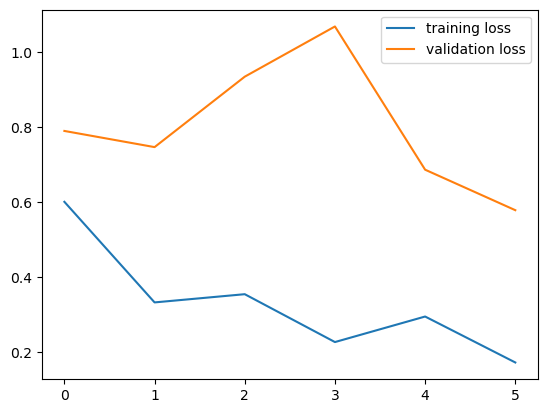

In [24]:
plt.plot(hist.history["loss"], label="training loss")
plt.plot(hist.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

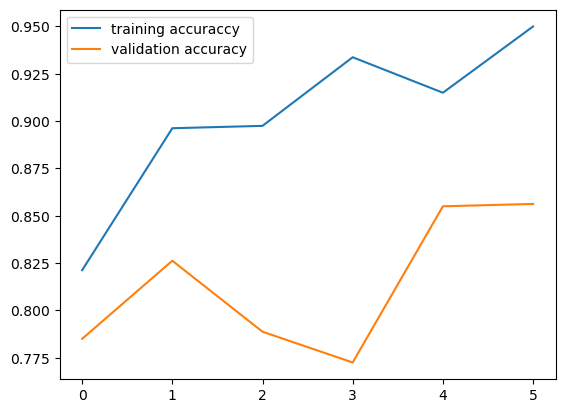

In [26]:
plt.plot(hist.history["accuracy"], label="training accuraccy")
plt.plot(hist.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

In [27]:
# save history
import json, codecs
with open("vgg16_history.json","w") as f:
    json.dump(hist.history,f)

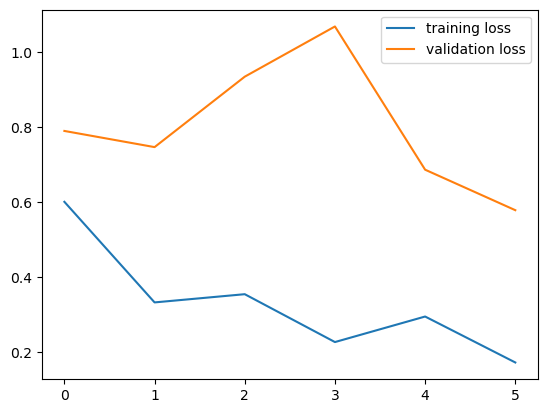

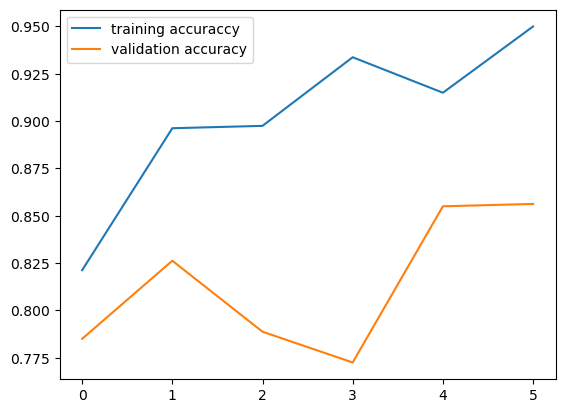

In [29]:
#load history
with codecs.open("vgg16_history.json","r", encoding="utf-8") as f:
    n= json.loads(f.read())
    
plt.plot(n["loss"], label="training loss")
plt.plot(n["val_loss"], label="validation loss")
plt.legend()
plt.show()


plt.plot(n["accuracy"], label="training accuraccy")
plt.plot(n["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()